This notebook concens the geoprocessing of the coastal ports/towns/regions - we have the names of the areas/ports, but need to obtain geocoded data so that we can plot the data on a map.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
from geopandas.tools import geocode

In [3]:
df = pd.read_csv('UK_tide_data_march2024.csv')

In [4]:
df

,Unnamed: 0,index,Port,Date,Time,Height,HiLo
0,0,0,Aberdaron,2024-03-01,05:43,1.04,Low
1,1,1,Aberdaron,2024-03-01,11:24,3.97,High
2,2,2,Aberdaron,2024-03-01,18:07,1.23,Low
3,3,3,Aberdaron,2024-03-01,23:48,3.71,High
4,4,0,Aberdaron,2024-03-02,06:16,1.31,Low
...,...,...,...,...,...,...,...
79598,79598,3,Youghal,2024-03-30,20:26,3.56,High
79599,79599,0,Youghal,2024-03-31,03:53,0.87,Low
79600,79600,1,Youghal,2024-03-31,09:47,3.45,High
79601,79601,2,Youghal,2024-03-31,16:11,0.99,Low


In [5]:
print(df.Date.dtype, df.Time.dtype, df.Height.dtype)

object object float64


In [7]:
locations = list(df.Port.unique())

In [8]:
locations

['Aberdaron',
 'Aberdeen',
 'Aberdovey',
 'Aberporth',
 'Aberystwyth',
 'Albert Bridge',
 'Aldeburgh',
 'Allington Lock',
 'Alloa',
 'Amble',
 'Amlwch',
 'Annan Waterfoot',
 'Anstruther Easter',
 'Applecross',
 'Appledore',
 'Arbroath',
 'Ardchattan Point',
 'Ardglass',
 'Ardnave Point',
 'Ardrossan',
 'Arklow',
 'Arnside',
 'Arrochar',
 'Ayr',
 'Badcall Bay',
 'Baginbun Head',
 'Balbriggan',
 'Balivanich',
 'Ballinskelligs Bay Castle',
 'Ballycastle Bay',
 'Ballycotton',
 'Ballycrovane Harbour',
 'Ballysadare Bay (Culleenamore)',
 'Baltasound Pier',
 'Baltimore, Ireland',
 'Banff',
 'Bangor',
 'Bantry',
 'Barcaldine Pier',
 'Bardsey Island',
 'Barmouth',
 'Barnstaple',
 'Barra Head',
 'Barra (North Bay)',
 'Barrow (Ramsden Dock)',
 'Barry',
 'Bartlett Creek',
 'Battlesbridge',
 'Bawdsey',
 'Bay Of Laig',
 'Bay Of Quendale',
 'Bays Loch',
 'Beachley (Aust)',
 'Beaumaris',
 'Bee Ness',
 'Belfast',
 'Bembridge Approaches',
 'Bembridge Harbour',
 'Berkeley',
 'Berwick',
 'Bideford',
 'Bla

In [9]:
len(locations)

705

In [8]:
geo = geocode(locations, 
              provider='nominatim', 
              user_agent='autogis_xx', 
              timeout=4)

geo

,geometry,address
0,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,POINT (-2.09281 57.14824),"Aberdeen City, Alba / Scotland, United Kingdom"
2,POINT (-4.05632 52.54435),"Aberdyfi, Station Road, Aberdovey, Aberdyfi, G..."
3,POINT (-4.54622 52.13417),"Aberporth, Ceredigion, Cymru / Wales, SA43 2DB..."
4,POINT (-4.08168 52.41431),"Aberystwyth, Ceredigion, Cymru / Wales, SY23 1..."
...,...,...
700,POINT (0.47494 51.35290),"Wouldham, Tonbridge and Malling, Kent, England..."
701,POINT (-3.00752 53.92648),"Pharos Lighthouse, Pharos Street, Fleetwood, W..."
702,POINT (1.73148 52.60717),"Great Yarmouth, Norfolk, England, United Kingdom"
703,POINT (-2.59431 51.45356),"Toni & Marco, Baldwin Street, Old City, City C..."


<AxesSubplot:>

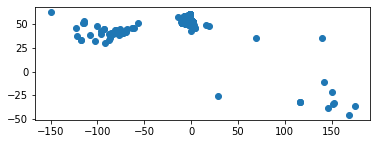

In [18]:
geo.geometry.plot()

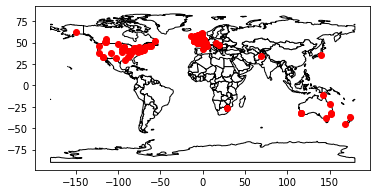

In [29]:
# plotting coordinates over a country level map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# then restrict this to the United Kingdom
ax = world.plot(
    color='white', edgecolor='black')

# then plot the geodataframe on this
geo.geometry.plot(ax=ax, color='red')
plt.show()

Evidently a lot of the initial port names were incorrectly geocoded. The current fix for this is to manually edit port locations that default, in the 'nominatim' geocoding process, to places outside of the UK/Ireland. The updates locations are read back in in the following cells, and re-geocoded in order to obtain the correct geometries/addresses.

In [30]:
geo.to_csv('initial_locations.csv')

In [32]:
pd.Series(locations).to_csv('location_port_names.csv')

In [34]:
df_new_locs = pd.read_csv('updated_locations.csv')
df_new_locs

,Unnamed: 0,geometry,address_old,address_old_2,address_update,address_label
0,0,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...","Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...","Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",Aberdaron
1,1,POINT (-2.0928095 57.1482429),"Aberdeen City, Alba / Scotland, United Kingdom","Aberdeen City, Alba / Scotland, United Kingdom","Aberdeen City, Alba / Scotland, United Kingdom",Aberdeen
2,2,POINT (-4.0563163 52.5443486),"Aberdyfi, Station Road, Aberdovey, Aberdyfi, G...","Aberdyfi, Station Road, Aberdovey, Aberdyfi, G...","Aberdyfi, Station Road, Aberdovey, Aberdyfi, G...",Aberdovey
3,3,POINT (-4.5462206 52.1341692),"Aberporth, Ceredigion, Cymru / Wales, SA43 2DB...","Aberporth, Ceredigion, Cymru / Wales, SA43 2DB...","Aberporth, Ceredigion, Cymru / Wales, SA43 2DB...",Aberporth
4,4,POINT (-4.0816846 52.4143113),"Aberystwyth, Ceredigion, Cymru / Wales, SY23 1...","Aberystwyth, Ceredigion, Cymru / Wales, SY23 1...","Aberystwyth, Ceredigion, Cymru / Wales, SY23 1...",Aberystwyth
...,...,...,...,...,...,...
700,700,POINT (0.4749449537650609 51.35290089999999),"Wouldham, Tonbridge and Malling, Kent, England...","Wouldham, Tonbridge and Malling, Kent, England...","Wouldham, Tonbridge and Malling, Kent, England...",Wouldham
701,701,POINT (-3.007515 53.9264838),"Pharos Lighthouse, Pharos Street, Fleetwood, W...","Pharos Lighthouse, Pharos Street, Fleetwood, W...","Pharos Lighthouse, Pharos Street, Fleetwood, W...",Wyre Lighthouse
702,702,POINT (1.7314845 52.6071742),"Great Yarmouth, Norfolk, England, United Kingdom","Great Yarmouth, Norfolk, England, United Kingdom","Great Yarmouth, Norfolk, England, United Kingdom",Yarmouth
703,703,POINT (-2.594305374411767 51.4535638),"Toni & Marco, Baldwin Street, Old City, City C...","Toni & Marco, Baldwin Street, Old City, City C...","Toni & Marco, Baldwin Street, Old City, City C...",Yelland Marsh


In [35]:
locs_addresses = df_new_locs.address_update
locs_addresses

0      Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...
1         Aberdeen City, Alba / Scotland, United Kingdom
2      Aberdyfi, Station Road, Aberdovey, Aberdyfi, G...
3      Aberporth, Ceredigion, Cymru / Wales, SA43 2DB...
4      Aberystwyth, Ceredigion, Cymru / Wales, SY23 1...
                             ...                        
700    Wouldham, Tonbridge and Malling, Kent, England...
701    Pharos Lighthouse, Pharos Street, Fleetwood, W...
702     Great Yarmouth, Norfolk, England, United Kingdom
703    Toni & Marco, Baldwin Street, Old City, City C...
704        Youghal, County Cork, Munster, Éire / Ireland
Name: address_update, Length: 705, dtype: object

In [37]:
geo_update = geocode(locs_addresses, 
              provider='nominatim', 
              user_agent='coultergabriel@gmail.com', 
              timeout=4)

geo_update

,geometry,address
0,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,POINT (-2.09281 57.14824),"Aberdeen City, Alba / Scotland, United Kingdom"
2,POINT (-4.05632 52.54435),"Aberdyfi, Station Road, Aberdovey, Aberdyfi, G..."
3,POINT (-4.54622 52.13417),"Aberporth, Ceredigion, Cymru / Wales, SA43 2DB..."
4,POINT (-4.08168 52.41431),"Aberystwyth, Ceredigion, Cymru / Wales, SY23 1..."
...,...,...
700,POINT (0.47494 51.35290),"Wouldham, Tonbridge and Malling, Kent, England..."
701,POINT (-3.00752 53.92648),"Pharos Lighthouse, Pharos Street, Fleetwood, W..."
702,POINT (1.73148 52.60717),"Great Yarmouth, Norfolk, England, United Kingdom"
703,POINT (-2.59431 51.45356),"Toni & Marco, Baldwin Street, Old City, City C..."


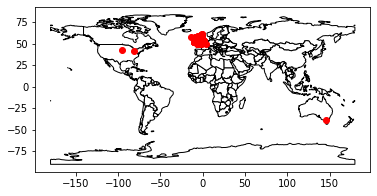

In [38]:
# plotting coordinates over a country level map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# then restrict this to the United Kingdom
ax = world.plot(
    color='white', edgecolor='black')

# then plot the geodataframe on this
geo_update.geometry.plot(ax=ax, color='red')
plt.show()

Again, some issues geocoding here - should all be in and around the UK

In [45]:
geo_update.to_csv('updated_location_addresses.csv')

In [11]:
df_updated_addresses = pd.read_csv('updated_location_addresses-edit.csv')

In [12]:
df_updated_addresses

,Unnamed: 0,geometry,address
0,0,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,1,POINT (-2.0928095 57.1482429),"Aberdeen City, Alba / Scotland, United Kingdom"
2,2,POINT (-4.0563163 52.5443486),"Aberdyfi, Station Road, Aberdovey, Aberdyfi, G..."
3,3,POINT (-4.5462206 52.1341692),"Aberporth, Ceredigion, Cymru / Wales, SA43 2DB..."
4,4,POINT (-4.0816846 52.4143113),"Aberystwyth, Ceredigion, Cymru / Wales, SY23 1..."
...,...,...,...
700,700,POINT (0.4749449537650609 51.35290089999999),"Wouldham, Tonbridge and Malling, Kent, England..."
701,701,POINT (-3.007515 53.9264838),"Pharos Lighthouse, Pharos Street, Fleetwood, W..."
702,702,POINT (1.7314845 52.6071742),"Great Yarmouth, Norfolk, England, United Kingdom"
703,703,POINT (-2.594305374411767 51.4535638),"Toni & Marco, Baldwin Street, Old City, City C..."


In [13]:
geo_new = geocode(df_updated_addresses.address, 
              provider='nominatim', 
              user_agent='coultergabriel@gmail.com', 
              timeout=4)

geo_new

,geometry,address
0,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,POINT (-2.09281 57.14824),"Aberdeen City, Alba / Scotland, United Kingdom"
2,POINT (-4.05632 52.54435),"Aberdyfi, Station Road, Aberdovey, Aberdyfi, G..."
3,POINT (-4.54622 52.13417),"Aberporth, Ceredigion, Cymru / Wales, SA43 2DB..."
4,POINT (-4.08168 52.41431),"Aberystwyth, Ceredigion, Cymru / Wales, SY23 1..."
...,...,...
700,POINT (0.47494 51.35290),"Wouldham, Tonbridge and Malling, Kent, England..."
701,POINT (-3.00752 53.92648),"Pharos Lighthouse, Pharos Street, Fleetwood, W..."
702,POINT (1.73148 52.60717),"Great Yarmouth, Norfolk, England, United Kingdom"
703,POINT (-2.59431 51.45356),"Toni & Marco, Baldwin Street, Old City, City C..."


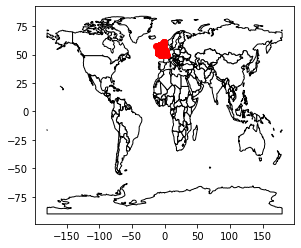

In [16]:
# plotting coordinates over a country level map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# plotting coordinates over a country level map
UKandIE = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# then restrict this to the United Kingdom
ax = world.plot(
    color='white', edgecolor='black')

# then plot the geodataframe on this
geo_new.geometry.plot(ax=ax, color='red')
plt.show()

Much better

In [4]:
# Clipped background map data

filepath = 'Clipped3/UKlandClip3.dbf'

map_df = gpd.read_file(filepath)
map_df.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,0.0,0.0,"MULTIPOLYGON (((-4.22949 48.30954, -4.23054 48..."
1,Land,6.0,5.0,"MULTIPOLYGON (((0.93247 51.39769, 0.94215 51.3..."
2,Land,5.0,3.0,"MULTIPOLYGON (((-2.06786 49.25068, -2.02066 49..."
3,Land,6.0,6.0,"MULTIPOLYGON (((-5.04817 48.47651, -5.04625 48..."
4,Land,5.0,4.0,"MULTIPOLYGON (((-2.55956 49.49934, -2.53820 49..."


<AxesSubplot:>

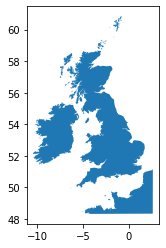

In [19]:
map_df.plot()

In [59]:
%matplotlib inline

<AxesSubplot:>

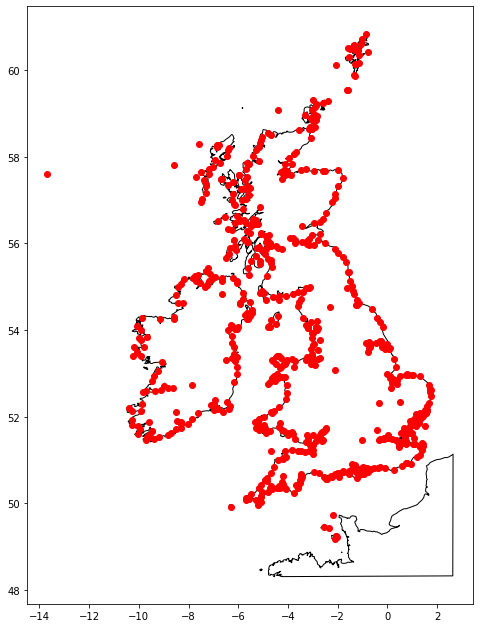

In [34]:
fig, ax = plt.subplots(1, figsize=(8, 12))

map_df.plot(ax = ax, color='white', edgecolor='black')

geo_new.geometry.plot(ax=ax, color='red')


In [22]:
geo_new[geo_new.address.str.contains('France', na=False)]

,geometry,address
82,POINT (3.37169 49.42341),"Braye, Soissons, Aisne, Hauts-de-France, Franc..."


In [31]:
geo_new.iloc[[82]] = geocode('Braye, Guernsey', 
              provider='nominatim', 
              user_agent='coultergabriel@gmail.com', 
              timeout=4)

In [32]:
geo_new.iloc[82]

geometry            POINT (-2.2008 49.7230396)
address     Braye, Alderney, GY9 3XT, Guernsey
Name: 82, dtype: object

In [33]:
locations[82]

'Braye'

In [38]:
geo_new['name'] = pd.Series(locations)

In [39]:
geo_new

,geometry,address,name
0,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",Aberdaron
1,POINT (-2.09281 57.14824),"Aberdeen City, Alba / Scotland, United Kingdom",Aberdeen
2,POINT (-4.05632 52.54435),"Aberdyfi, Station Road, Aberdovey, Aberdyfi, G...",Aberdovey
3,POINT (-4.54622 52.13417),"Aberporth, Ceredigion, Cymru / Wales, SA43 2DB...",Aberporth
4,POINT (-4.08168 52.41431),"Aberystwyth, Ceredigion, Cymru / Wales, SY23 1...",Aberystwyth
...,...,...,...
700,POINT (0.47494 51.35290),"Wouldham, Tonbridge and Malling, Kent, England...",Wouldham
701,POINT (-3.00752 53.92648),"Pharos Lighthouse, Pharos Street, Fleetwood, W...",Wyre Lighthouse
702,POINT (1.73148 52.60717),"Great Yarmouth, Norfolk, England, United Kingdom",Yarmouth
703,POINT (-2.59431 51.45356),"Toni & Marco, Baldwin Street, Old City, City C...",Yelland Marsh


In [40]:
geo_new.to_csv('location_geodf_final.csv')

In [43]:
df

,Unnamed: 0,index,Port,Date,Time,Height,HiLo
0,0,0,Aberdaron,2024-03-01,05:43,1.04,Low
1,1,1,Aberdaron,2024-03-01,11:24,3.97,High
2,2,2,Aberdaron,2024-03-01,18:07,1.23,Low
3,3,3,Aberdaron,2024-03-01,23:48,3.71,High
4,4,0,Aberdaron,2024-03-02,06:16,1.31,Low
...,...,...,...,...,...,...,...
79598,79598,3,Youghal,2024-03-30,20:26,3.56,High
79599,79599,0,Youghal,2024-03-31,03:53,0.87,Low
79600,79600,1,Youghal,2024-03-31,09:47,3.45,High
79601,79601,2,Youghal,2024-03-31,16:11,0.99,Low


In [44]:
df.columns

Index(['Unnamed: 0', 'index', 'Port', 'Date', 'Time', 'Height', 'HiLo'], dtype='object')

In [47]:
df_tide_data = df.drop(['Unnamed: 0', 'index'], axis=1)

In [50]:
df_join = df_tide_data.join(geo_new.set_index('name'), on='Port')

In [51]:
df_join

,Port,Date,Time,Height,HiLo,geometry,address
0,Aberdaron,2024-03-01,05:43,1.04,Low,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,Aberdaron,2024-03-01,11:24,3.97,High,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
2,Aberdaron,2024-03-01,18:07,1.23,Low,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
3,Aberdaron,2024-03-01,23:48,3.71,High,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
4,Aberdaron,2024-03-02,06:16,1.31,Low,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...,...,...
79598,Youghal,2024-03-30,20:26,3.56,High,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"
79599,Youghal,2024-03-31,03:53,0.87,Low,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"
79600,Youghal,2024-03-31,09:47,3.45,High,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"
79601,Youghal,2024-03-31,16:11,0.99,Low,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"


In [ ]:
df_join.to_csv('final_geo_tide_df.csv') # Export final GeoPandas and Tide time/height combined dataframe